In [59]:
import pandas_datareader as pdr

In [60]:
import pandas_datareader as pdr
key=""

In [61]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

C:\Users\user\AppData\Local\Temp\ipykernel_17624\1593133401.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pdr.get_data_tiingo('AAPL', api_key=key)


In [62]:
df.to_csv('AAPL.csv')

In [63]:
import pandas as pd

In [64]:
df=pd.read_csv('AAPL.csv')

In [65]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2019-05-24 00:00:00+00:00,178.97,182.14,178.62,180.20,23714686,43.181435,43.946284,43.096988,43.478206,94858744,0.0,1.0
1,AAPL,2019-05-28 00:00:00+00:00,178.23,180.59,177.91,178.92,27948160,43.002889,43.572304,42.925681,43.169371,111792640,0.0,1.0
2,AAPL,2019-05-29 00:00:00+00:00,177.38,179.35,176.00,176.42,28481165,42.797804,43.273120,42.464841,42.566177,113924660,0.0,1.0
3,AAPL,2019-05-30 00:00:00+00:00,178.30,179.23,176.67,177.95,21218412,43.019779,43.244167,42.626497,42.935332,84873648,0.0,1.0
4,AAPL,2019-05-31 00:00:00+00:00,175.07,177.99,174.99,176.23,27043584,42.240452,42.944983,42.221150,42.520334,108174336,0.0,1.0


In [66]:
df1=df.reset_index()['close']

In [67]:
df1

0       178.97
1       178.23
2       177.38
3       178.30
4       175.07
         ...  
1252    189.72
1253    189.84
1254    189.87
1255    191.04
1256    192.35
Name: close, Length: 1257, dtype: float64

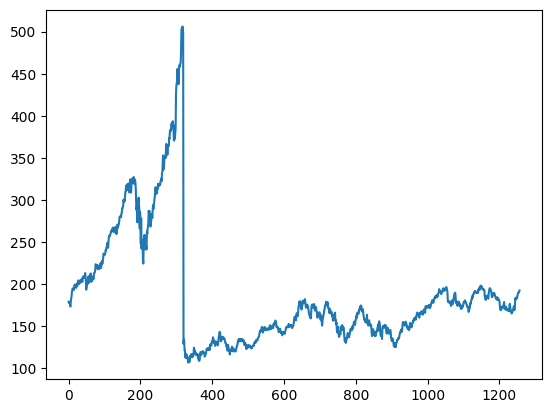

In [68]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [69]:
import numpy as np

In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [71]:
df1

array([[0.18066374],
       [0.17881027],
       [0.17668128],
       ...,
       [0.20796493],
       [0.21089543],
       [0.21417658]])

In [72]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [73]:
training_size,test_size

(817, 440)

In [74]:
train_data

array([[1.80663745e-01],
       [1.78810269e-01],
       [1.76681277e-01],
       [1.78985598e-01],
       [1.70895429e-01],
       [1.66462116e-01],
       [1.82341891e-01],
       [1.89605510e-01],
       [1.96318096e-01],
       [2.08666249e-01],
       [2.14752661e-01],
       [2.20338134e-01],
       [2.18785222e-01],
       [2.18685034e-01],
       [2.15153413e-01],
       [2.18033813e-01],
       [2.29455229e-01],
       [2.28002505e-01],
       [2.31984972e-01],
       [2.30281778e-01],
       [2.29780839e-01],
       [2.22241703e-01],
       [2.32836569e-01],
       [2.32686287e-01],
       [2.28127740e-01],
       [2.37219787e-01],
       [2.40175329e-01],
       [2.44383219e-01],
       [2.43932373e-01],
       [2.33387602e-01],
       [2.36443331e-01],
       [2.41427677e-01],
       [2.37720726e-01],
       [2.41603006e-01],
       [2.46386976e-01],
       [2.44608641e-01],
       [2.41728240e-01],
       [2.47514089e-01],
       [2.39824671e-01],
       [2.51421415e-01],


In [75]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [76]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [77]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [78]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [79]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

This code initializes a sequential model in Keras. It adds three LSTM layers with 70 units each, followed by a Dense layer. The model is compiled using mean squared error loss and the Adam optimizer for training. This architecture suits sequence prediction tasks.

In [101]:
model=Sequential()
model.add(LSTM(70,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(70,return_sequences=True))
model.add(LSTM(70))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [102]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 70)           20160     
                                                                 
 lstm_10 (LSTM)              (None, 100, 70)           39480     
                                                                 
 lstm_11 (LSTM)              (None, 70)                39480     
                                                                 
 dense_3 (Dense)             (None, 1)                 71        
                                                                 
Total params: 99,191
Trainable params: 99,191
Non-trainable params: 0
_________________________________________________________________


In [103]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 70)           20160     
                                                                 
 lstm_10 (LSTM)              (None, 100, 70)           39480     
                                                                 
 lstm_11 (LSTM)              (None, 70)                39480     
                                                                 
 dense_3 (Dense)             (None, 1)                 71        
                                                                 
Total params: 99,191
Trainable params: 99,191
Non-trainable params: 0
_________________________________________________________________


This line of code trains the defined model using training data `(X_train, y_train)` for 100 epochs, with a batch size of 64. It also specifies validation data `(X_test, y_test)` for evaluating the model's performance during training, and `verbose=1` prints training progress updates.

In [104]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 10s 355ms/step - loss: 0.0346 - val_loss: 6.1502e-04
Epoch 2/100
12/12 [==============================] - 3s 230ms/step - loss: 0.0121 - val_loss: 0.0035
Epoch 3/100
12/12 [==============================] - 3s 218ms/step - loss: 0.0102 - val_loss: 2.0729e-04
Epoch 4/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0080 - val_loss: 2.1731e-04
Epoch 5/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0068 - val_loss: 1.8760e-04
Epoch 6/100
12/12 [==============================] - 3s 222ms/step - loss: 0.0068 - val_loss: 1.8004e-04
Epoch 7/100
12/12 [==============================] - 3s 218ms/step - loss: 0.0052 - val_loss: 2.9399e-04
Epoch 8/100
12/12 [==============================] - 3s 219ms/step - loss: 0.0047 - val_loss: 4.8221e-04
Epoch 9/100
12/12 [==============================] - 3s 221ms/step - loss: 0.0044 - val_loss: 6.2094e-04
Epoch 10/100
12/12 [==============================] - 3s 2

In [105]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 33ms/step


In [106]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [107]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

215.64169117522871

In [108]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

177.08339732254575

This code segment is for plotting time series data along with predictions. It shifts the predicted values to align them with the original data. Then, it plots the original data, training predictions, and test predictions using Matplotlib. Finally, it displays the plot.

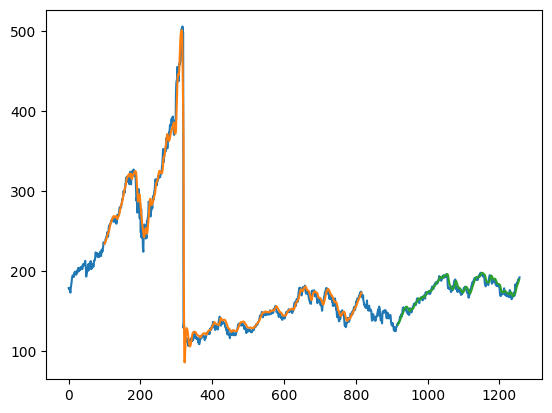

In [109]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [110]:
len(test_data)

440

In [111]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [112]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [113]:
temp_input

[0.2172573575453976,
 0.21462742642454596,
 0.19737006887914832,
 0.19388854101440195,
 0.18802755165936125,
 0.18619912335629302,
 0.1971696931747025,
 0.19611772072636185,
 0.1987476518472135,
 0.19724483406386972,
 0.19807138384470874,
 0.19233562930494674,
 0.18995616781465247,
 0.20485911083281144,
 0.21219787100814025,
 0.21803381340012518,
 0.2212648716343143,
 0.21956167814652466,
 0.2187351283656856,
 0.21435190983093294,
 0.2126236693800876,
 0.2033813400125234,
 0.1942642454602379,
 0.2004257983719474,
 0.19789605510331865,
 0.20247964934251717,
 0.20653725735754536,
 0.20681277395115838,
 0.20408265497808387,
 0.2054101440200375,
 0.20115216030056354,
 0.19586725109580455,
 0.1936380713838447,
 0.19291170945522856,
 0.18902943018159046,
 0.18715090795241074,
 0.18905447714464613,
 0.19418910457107075,
 0.1895554164057608,
 0.18614902943018152,
 0.18983093299937376,
 0.1868002504696305,
 0.18512210394489664,
 0.18239198497182213,
 0.17097056981840947,
 0.1584971822166562,
 0

In [114]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.21261433]
101
1 day input [0.21462743 0.19737007 0.19388854 0.18802755 0.18619912 0.19716969
 0.19611772 0.19874765 0.19724483 0.19807138 0.19233563 0.18995617
 0.20485911 0.21219787 0.21803381 0.22126487 0.21956168 0.21873513
 0.21435191 0.21262367 0.20338134 0.19426425 0.2004258  0.19789606
 0.20247965 0.20653726 0.20681277 0.20408265 0.20541014 0.20115216
 0.19586725 0.19363807 0.19291171 0.18902943 0.18715091 0.18905448
 0.1941891  0.18955542 0.18614903 0.18983093 0.18680025 0.1851221
 0.18239198 0.17097057 0.15849718 0.15599249 0.15569192 0.16002505
 0.16508453 0.16628679 0.16102693 0.16571071 0.16475892 0.16751409
 0.17342517 0.17991234 0.16162805 0.16390733 0.16032561 0.15747026
 0.16648716 0.16190357 0.15827176 0.15529117 0.15731997 0.15524108
 0.15714465 0.15431434 0.15737007 0.15263619 0.17082029 0.17460238
 0.16493425 0.15664371 0.15318723 0.15078272 0.14567314 0.14777708
 0.15043206 0.15574202 0.1579211  0.15644333 0.16696306 0.15902317
 0.15644333 0.16578585 0.19170946 

In [115]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [116]:
len(df1)

1257

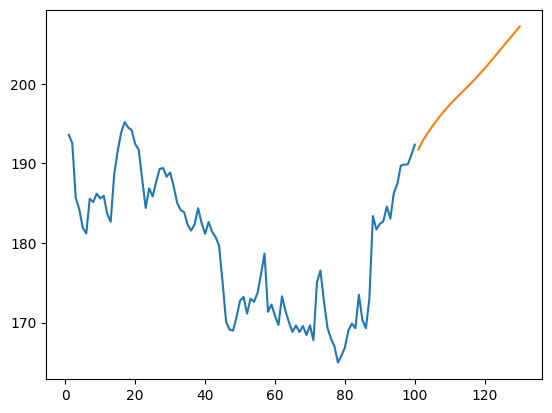

In [117]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

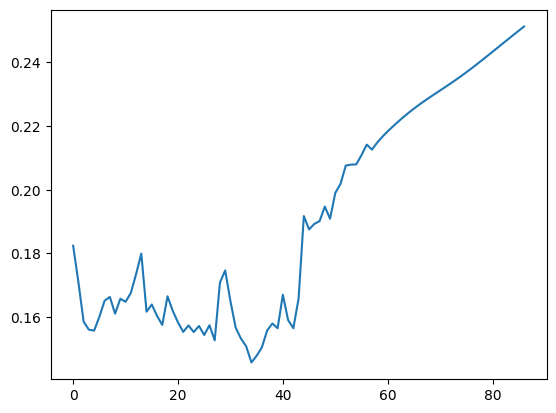

In [118]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [119]:
df3=scaler.inverse_transform(df3).tolist()

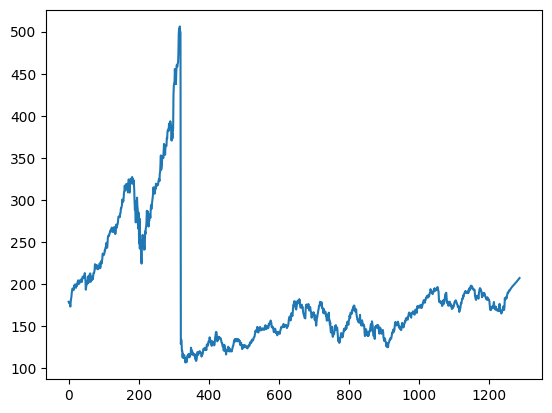

In [120]:
plt.plot(df3)